In [21]:
# Packages
import pandas as pd
from sklearn.feature_selection import chi2
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import scipy.stats as st
from scipy import stats, interp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
import numpy as np
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import f1_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,auc
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler,label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from statsmodels.discrete.discrete_model import Logit
import os
from itertools import cycle

In [2]:
# Load dataset
def set_up_dataframes(l,*test):
    if l == 1 and len(test) == 1:
        print('Setting train and test frame and l = 1')
        avg_rss12 = pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss12['Instance'] = range(0,88)
        avg_rss12.set_index('Instance',inplace=True)

        var_rss12 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss12['Instance'] = range(0,88)
        var_rss12.set_index('Instance',inplace=True)


        avg_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss13['Instance'] = range(0,88)
        avg_rss13.set_index('Instance',inplace=True)

        var_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss13['Instance'] = range(0,88)
        var_rss13.set_index('Instance',inplace=True)

        avg_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss23['Instance'] = range(0,88)
        avg_rss23.set_index('Instance',inplace=True)

        var_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss23['Instance'] = range(0,88)
        var_rss23.set_index('Instance',inplace=True)
    elif l == 1 and len(test) == 0:
        print('setting train frame for l = 1')
        avg_rss12 = pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss12['Instance'] = range(0,69)
        avg_rss12.set_index('Instance',inplace=True)

        var_rss12 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss12['Instance'] = range(0,69)
        var_rss12.set_index('Instance',inplace=True)

        avg_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss13['Instance'] = range(0,69)
        avg_rss13.set_index('Instance',inplace=True)

        var_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss13['Instance'] = range(0,69)
        var_rss13.set_index('Instance',inplace=True)

        avg_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss23['Instance'] = range(0,69)
        avg_rss23.set_index('Instance',inplace=True)

        var_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss23['Instance'] = range(0,69)
        var_rss23.set_index('Instance',inplace=True)
    elif l > 1 and len(test) == 0:
        print('setting training dataframes for l > 1')
        cols = ['min','max','mean','median','1qt','3qt','file','TS','split'] * l
        avg_rss12 = pd.DataFrame(columns = cols)

        avg_rss12['Instance'] = range(0,69)
        avg_rss12.set_index('Instance',inplace=True)

        var_rss12 =  pd.DataFrame(columns = cols)
        var_rss12['Instance'] = range(0,69)
        var_rss12.set_index('Instance',inplace=True)

        avg_rss13 =  pd.DataFrame(columns = cols)
        avg_rss13['Instance'] = range(0,69)
        avg_rss13.set_index('Instance',inplace=True)

        var_rss13 =  pd.DataFrame(columns = cols)
        var_rss13['Instance'] = range(0,69)
        var_rss13.set_index('Instance',inplace=True)

        avg_rss23 =  pd.DataFrame(columns = cols)
        avg_rss23['Instance'] = range(0,69)
        avg_rss23.set_index('Instance',inplace=True)

        var_rss23 =  pd.DataFrame(columns = cols)
        var_rss23['Instance'] = range(0,69)
        var_rss23.set_index('Instance',inplace=True)
    
    if l > 1 and len(test) > 1:
        print('setting testing dataframes for l > 1')
        cols = ['min','max','mean','median','1qt','3qt','file','TS','split'] * l
        avg_rss12 = pd.DataFrame(columns = cols)

        avg_rss12['Instance'] = range(0,19)
        avg_rss12.set_index('Instance',inplace=True)

        var_rss12 =  pd.DataFrame(columns = cols)
        var_rss12['Instance'] = range(0,19)
        var_rss12.set_index('Instance',inplace=True)


        avg_rss13 =  pd.DataFrame(columns = cols)
        avg_rss13['Instance'] = range(0,19)
        avg_rss13.set_index('Instance',inplace=True)

        var_rss13 =  pd.DataFrame(columns = cols)
        var_rss13['Instance'] = range(0,19)
        var_rss13.set_index('Instance',inplace=True)

        avg_rss23 =  pd.DataFrame(columns = cols)
        avg_rss23['Instance'] = range(0,19)
        avg_rss23.set_index('Instance',inplace=True)

        var_rss23 =  pd.DataFrame(columns = cols)
        var_rss23['Instance'] = range(0,19)
        var_rss23.set_index('Instance',inplace=True)
    elif l == 1 and len(test) > 1:
        print('setting testing frames for l = 1')
        avg_rss12 = pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss12['Instance'] = range(0,19)
        avg_rss12.set_index('Instance',inplace=True)

        var_rss12 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss12['Instance'] = range(0,19)
        var_rss12.set_index('Instance',inplace=True)

        avg_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss13['Instance'] = range(0,19)
        avg_rss13.set_index('Instance',inplace=True)

        var_rss13 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss13['Instance'] = range(0,19)
        var_rss13.set_index('Instance',inplace=True)

        avg_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        avg_rss23['Instance'] = range(0,19)
        avg_rss23.set_index('Instance',inplace=True)

        var_rss23 =  pd.DataFrame(columns=['Instance','min','max','mean','median','1qt','3qt','file','TS'])
        var_rss23['Instance'] = range(0,19)
        var_rss23.set_index('Instance',inplace=True)
        
    return (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23)



In [3]:
def split_float(x,*switch):
    if len(switch) == 0:
        f = x.str.split(',')
        ints = []
        f = f.tolist()
        for val in f[0]:
            try:
                val = float(val)
                ints.append(val)
            except:
                continue   
    else:    
        ints = []
        for val in x:
            val = float(val)
            ints.append(val)
    return ints

def extract_feats_train(l,*test):
    os.chdir('/Users/rubinakabir/Documents/552/Train')
    col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    instance = 0
    print('Number of splits: \t',l)
    
    if len(test) > 0:
        (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23) = set_up_dataframes(l,test)
    elif len(test) == 0:
        (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23) = set_up_dataframes(l)
    
    for file in os.listdir():
        df = pd.DataFrame(columns=col,index=range(0,480))
        temp = pd.read_csv(file,sep = 'delimiter',header=None,engine='python')
        temp.drop(range(0,5),inplace=True)
            
        if file != 'dataset4_b2.csv':
            temp = temp.apply(split_float,axis=1)
        
        r = 0
        for row in temp.values.tolist():        
            if file == 'dataset4_b2.csv':
                fix = row[0].split()[1:]
                fixed = split_float(fix,1)
                df.iloc[r,:] = fixed
            else:
                df.iloc[r,:] = row[1:7]
            r = r + 1
        dot = file.rfind('.')
        under = file.rfind('_')
        fname = file[under+1:dot]

        if l > 1:
            first_l = 480 // l
            col_fill_start = 0
            col_fill_end = 9
            for split in range(1,l+1):
                if split == 1:
                    start = 0
                else:
                    start = end + 1
                end = first_l * split - 1
                
                avg_rss12.iloc[instance, col_fill_start:col_fill_end] = [df['avg_rss12'][start:end].min(),df['avg_rss12'][start:end].max(),
                    df['avg_rss12'][start:end].mean(), df['avg_rss12'][start:end].median(),
                    df['avg_rss12'][start:end].quantile(q=0.25),df['avg_rss12'][start:end].quantile(q=0.75),fname,1,split]

                var_rss12.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss12'][start:end].min(),df['var_rss12'][start:end].max(),
                    df['var_rss12'][start:end].mean(), df['var_rss12'][start:end].median(),
                    df['var_rss12'][start:end].quantile(q=0.25),df['var_rss12'][start:end].quantile(q=0.75),fname,2,split]
                
                avg_rss13.iloc[instance,col_fill_start:col_fill_end] = [df['avg_rss13'][start:end].min(),df['avg_rss13'][start:end].max(),
                    df['avg_rss13'][start:end].mean(), df['avg_rss13'][start:end].median(),
                    df['avg_rss13'][start:end].quantile(q=0.25),df['avg_rss13'][start:end].quantile(q=0.75),fname,3,split]
                
                var_rss13.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss13'][0:end].min(),df['var_rss13'][start:end].max(),
                    df['var_rss13'][start:end].mean(), df['var_rss13'][start:end].median(),
                    df['var_rss13'][start:end].quantile(q=0.25),df['var_rss13'][start:end].quantile(q=0.75),fname,4,split]
                
                avg_rss23.iloc[instance,col_fill_start:col_fill_end] = [df['avg_rss23'][start:end].min(),df['avg_rss23'][start:end].max(),
                    df['avg_rss23'][start:end].mean(), df['avg_rss23'][start:end].median(),
                    df['avg_rss23'][start:end].quantile(q=0.25),df['avg_rss23'][start:end].quantile(q=0.75), fname,5,split] 
                
                var_rss23.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss23'][start:end].min(),df['var_rss23'][start:end].max(),
                    df['var_rss23'][start:end].mean(), df['var_rss23'][start:end].median(),
                    df['var_rss23'][start:end].quantile(q=0.25),df['var_rss23'][start:end].quantile(q=0.75),fname,6,split]
               
                col_fill_start = col_fill_end
                col_fill_end = col_fill_end + 9 
        else:    
            avg_rss12.iloc[instance,:] = [df['avg_rss12'].min(),df['avg_rss12'].max(),df['avg_rss12'].mean(), df['avg_rss12'].median(),df['avg_rss12'].quantile(q=0.25),df['avg_rss12'].quantile(q=0.75),fname,1]
            var_rss12.iloc[instance,:] = [df['var_rss12'].min(),df['var_rss12'].max(),df['var_rss12'].mean(), df['var_rss12'].median(),df['var_rss12'].quantile(q=0.25),df['var_rss12'].quantile(q=0.75),fname,2]
            avg_rss13.iloc[instance,:] = [df['avg_rss13'].min(),df['avg_rss13'].max(),df['avg_rss13'].mean(), df['avg_rss13'].median(),df['avg_rss13'].quantile(q=0.25),df['avg_rss13'].quantile(q=0.75),fname,3]
            var_rss13.iloc[instance,:] = [df['var_rss13'].min(),df['var_rss13'].max(),df['var_rss13'].mean(), df['var_rss13'].median(),df['var_rss13'].quantile(q=0.25),df['var_rss13'].quantile(q=0.75),fname,4]
            avg_rss23.iloc[instance,:] = [df['avg_rss23'].min(),df['avg_rss23'].max(),df['avg_rss23'].mean(), df['avg_rss23'].median(),df['avg_rss23'].quantile(q=0.25),df['avg_rss23'].quantile(q=0.75), fname,5] 
            var_rss23.iloc[instance,:] = [df['var_rss23'].min(),df['var_rss23'].max(),df['var_rss23'].mean(), df['var_rss23'].median(),df['var_rss23'].quantile(q=0.25),df['var_rss23'].quantile(q=0.75),fname,6]
        
        instance = instance + 1
    
    return (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23)


In [4]:
def extract_feats_test(ret, l, *test):
    if len(test) == 0:
        (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23) = extract_feats_train(l)
    elif len(test) == 2 and ret == 'ii':
        (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23) = extract_feats_train(l,test[0],test[1])
        print('test instance = 69')
        instance = 69
    elif len(test) == 2 and ret == 'test':
        print('ret test')
        (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23) = set_up_dataframes(l,test[0],test[1])
    os.chdir('/Users/rubinakabir/Documents/552/Test')
    
    instance = 0
    if ret == 'ii':
        print('test instance = 69')
        instance = 69
        
    col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    print('inst', instance)
    for file in os.listdir():
        df = pd.DataFrame(columns=col,index=range(0,480))
        temp = pd.read_csv(file,sep = 'delimiter',header=None,engine='python')
        temp.drop(range(0,5),inplace=True)
    
        if file != 'dataset4_b2.csv':
            temp = temp.apply(split_float,axis=1)
        
        r = 0
        for row in temp.values.tolist():        
            df.iloc[r,:] = row[1:7]
            r = r + 1
        dot = file.rfind('.')
        under = file.rfind('_')
        fname = file[under+1:dot]

        if l > 1:
            first_l = 480 // l
            col_fill_start = 0
            col_fill_end = 9
            for split in range(1,l+1):
                if split == 1:
                    start = 0
                else:
                    start = end + 1
                end = first_l * split - 1
                
                avg_rss12.iloc[instance, col_fill_start:col_fill_end] = [df['avg_rss12'][start:end].min(),df['avg_rss12'][start:end].max(),
                    df['avg_rss12'][start:end].mean(), df['avg_rss12'][start:end].median(),
                    df['avg_rss12'][start:end].quantile(q=0.25),df['avg_rss12'][start:end].quantile(q=0.75),fname,1,split]

                var_rss12.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss12'][start:end].min(),df['var_rss12'][start:end].max(),
                    df['var_rss12'][start:end].mean(), df['var_rss12'][start:end].median(),
                    df['var_rss12'][start:end].quantile(q=0.25),df['var_rss12'][start:end].quantile(q=0.75),fname,2,split]
                
                avg_rss13.iloc[instance,col_fill_start:col_fill_end] = [df['avg_rss13'][start:end].min(),df['avg_rss13'][start:end].max(),
                    df['avg_rss13'][start:end].mean(), df['avg_rss13'][start:end].median(),
                    df['avg_rss13'][start:end].quantile(q=0.25),df['avg_rss13'][start:end].quantile(q=0.75),fname,3,split]
                
                var_rss13.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss13'][0:end].min(),df['var_rss13'][start:end].max(),
                    df['var_rss13'][start:end].mean(), df['var_rss13'][start:end].median(),
                    df['var_rss13'][start:end].quantile(q=0.25),df['var_rss13'][start:end].quantile(q=0.75),fname,4,split]
                
                avg_rss23.iloc[instance,col_fill_start:col_fill_end] = [df['avg_rss23'][start:end].min(),df['avg_rss23'][start:end].max(),
                    df['avg_rss23'][start:end].mean(), df['avg_rss23'][start:end].median(),
                    df['avg_rss23'][start:end].quantile(q=0.25),df['avg_rss23'][start:end].quantile(q=0.75), fname,5,split] 
                
                var_rss23.iloc[instance,col_fill_start:col_fill_end] = [df['var_rss23'][start:end].min(),df['var_rss23'][start:end].max(),
                    df['var_rss23'][start:end].mean(), df['var_rss23'][start:end].median(),
                    df['var_rss23'][start:end].quantile(q=0.25),df['var_rss23'][start:end].quantile(q=0.75),fname,6,split]
               
                col_fill_start = col_fill_end
                col_fill_end = col_fill_end + 9 
        else:    
            avg_rss12.iloc[instance,:] = [df['avg_rss12'].min(),df['avg_rss12'].max(),df['avg_rss12'].mean(), df['avg_rss12'].median(),df['avg_rss12'].quantile(q=0.25),df['avg_rss12'].quantile(q=0.75),fname,1]
            var_rss12.iloc[instance,:] = [df['var_rss12'].min(),df['var_rss12'].max(),df['var_rss12'].mean(), df['var_rss12'].median(),df['var_rss12'].quantile(q=0.25),df['var_rss12'].quantile(q=0.75),fname,2]
            avg_rss13.iloc[instance,:] = [df['avg_rss13'].min(),df['avg_rss13'].max(),df['avg_rss13'].mean(), df['avg_rss13'].median(),df['avg_rss13'].quantile(q=0.25),df['avg_rss13'].quantile(q=0.75),fname,3]
            var_rss13.iloc[instance,:] = [df['var_rss13'].min(),df['var_rss13'].max(),df['var_rss13'].mean(), df['var_rss13'].median(),df['var_rss13'].quantile(q=0.25),df['var_rss13'].quantile(q=0.75),fname,4]
            avg_rss23.iloc[instance,:] = [df['avg_rss23'].min(),df['avg_rss23'].max(),df['avg_rss23'].mean(), df['avg_rss23'].median(),df['avg_rss23'].quantile(q=0.25),df['avg_rss23'].quantile(q=0.75), fname,5] 
            var_rss23.iloc[instance,:] = [df['var_rss23'].min(),df['var_rss23'].max(),df['var_rss23'].mean(), df['var_rss23'].median(),df['var_rss23'].quantile(q=0.25),df['var_rss23'].quantile(q=0.75),fname,6]
        
        instance = instance + 1
    
    return (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23)


In [9]:
# (c) ii Data
all_data = pd.concat(extract_feats_test('ii',1,'test','l=1'), axis = 1)
all_data = all_data.loc[:, (all_data.columns!='TS') & (all_data.columns!='file')]
   
ts = 1
fix = []
for col in all_data.columns:
    if col == '3qt':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
all_data.columns = fix
all_data.head()

,min_1,max_1,mean_1,median_1,1qt_1,3qt,min_2,max_2,mean_2,median_2,...,mean_5,median_5,1qt_5,3qt,min_6,max_6,mean_6,median_6,1qt_6,3qt
Instance,,,,,,,,,,,,,,,,,,,,,
0,23.33,43.5,36.2441,36.75,33.4575,39.25,0,9.71,2.73602,2.17,...,18.4971,18.5,15.75,21,0,11.15,3.5305,3.11,2.17,4.6175
1,19,44,36.2284,36,34,39,0,12.28,2.83169,2.285,...,15.8724,16,14,18.0625,0,9.98,3.48069,3.34,2.1025,4.55
2,23.5,46.25,34.8732,35.25,31.75,38.25,0,14.82,4.38058,3.925,...,15.8739,16,13.75,18,0,9.51,3.42465,3.27,2.17,4.5
3,36,45.8,42.4199,42.67,41.33,44.6175,0,2.12,0.460563,0.47,...,10.0678,9.75,7.6275,12,0,6.65,1.22627,1.09,0.5,1.585
4,27,38.67,32.906,30.25,30,37,0,2.49,0.45675,0,...,18.0872,19.25,16.5,20.75,0,5.12,0.791354,0.71,0.43,1


In [11]:
# ii bootstrap CI of standard deviation - all instances
dfs = pd.concat(extract_feats_test('ii',1,'test','l=1'), axis = 1)
sds = {'min':None,'max':None,'mean':None,'median':None,'1qt':None,'3qt':None}
for col in dfs.columns[0:6]:
    sds[col] = dfs[col].sum(axis = 1).std(axis = 0)

dfsd = pd.DataFrame(columns = ['Estimated Standard Deviation'],index=dfs.columns[0:6])
dfsd['Estimated Standard Deviation'] = sds.values()
dfsd

Number of splits: 	 1
Setting train and test frame and l = 1
test instance = 69
test instance = 69
inst 69


,Estimated Standard Deviation
min,10.995330
max,17.119402
mean,10.510414
median,10.636667
1qt,10.564080
3qt,11.381644


In [12]:
bsdf = pd.DataFrame(index=dfs.columns[0:6],columns=['est','90% CI','90% CI'])
bsdf.loc['min',:] =  str(bs.bootstrap(np.array(dfs['min'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()
bsdf.loc['max',:] = str(bs.bootstrap(np.array(dfs['max'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()
bsdf.loc['mean',:] =  str(bs.bootstrap(np.array(dfs['mean'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()
bsdf.loc['median',:] =  str(bs.bootstrap(np.array(dfs['median'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()
bsdf.loc['1qt',:] = str(bs.bootstrap(np.array(dfs['1qt'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()
bsdf.loc['3qt',:]= str(bs.bootstrap(np.array(dfs['3qt'].sum(axis = 1),dtype='float'), stat_func=bs_stats.std,alpha=0.05)).split()

bsdf

,est,90% CI,90% CI
min,10.932678532932457,"(8.6143219095495,",13.508852834785943)
max,17.021854701738196,"(14.993827389791019,",19.616018344637048)
mean,10.45052547292295,"(8.493981412028306,",12.691447563975773)
median,10.576058928968214,"(8.582784557373246,",12.836653346887571)
1qt,10.503884873815725,"(8.511874375173262,",12.76851090611597)
3qt,11.316791000337746,"(9.362870504850596,",13.609455100150317)


In [7]:
# (c) iv Select important time domain features by examining relationships betwen features
all_data = pd.concat(extract_feats_test('ii',1,'test','l=1'))

all_data.iloc[:, 0:6].astype('float').corr()

Number of splits: 	 1
Setting train and test frame and l = 1
test instance = 69
test instance = 69
inst 69


,min,max,mean,median,1qt,3qt
min,1.000000,0.839298,0.915141,0.908246,0.928904,0.891729
max,0.839298,1.000000,0.972534,0.970555,0.956432,0.980944
mean,0.915141,0.972534,1.000000,0.999057,0.996840,0.997027
median,0.908246,0.970555,0.999057,1.000000,0.996248,0.996081
1qt,0.928904,0.956432,0.996840,0.996248,1.000000,0.988678
3qt,0.891729,0.980944,0.997027,0.996081,0.988678,1.000000


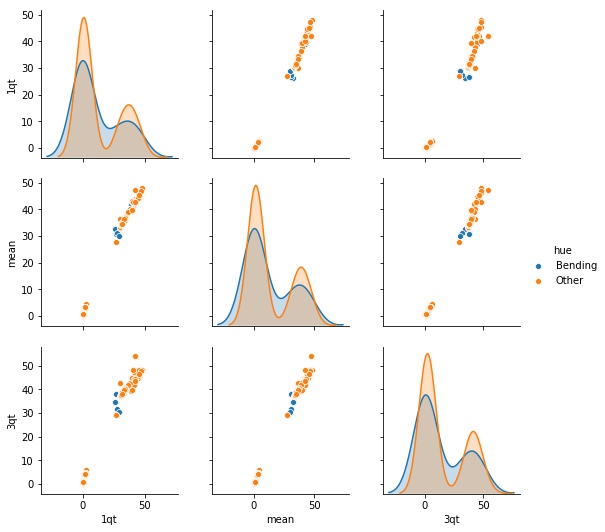

In [14]:
# '1qt','mean','3qt' matrix scatterplot for Timeseries 1,2,6
train = pd.concat(extract_feats_train(1))


bend = train[((train['file'] == 'b1') | (train['file'] == 'b2') )
             & ((train['TS'] == 1) | (train['TS'] == 2) | (train['TS'] == 6))][['1qt','mean','3qt']]
bend['hue'] = ['Bending']*bend.shape[0]

other = train[((train['file'] == 'cyc') | (train['file'] == 'walking') |
              (train['file'] == 'standing') | (train['file'] == 'sitting') |
              (train['file'] == 'lying')) & ((train['TS'] == 6) | 
            (train['TS'] == 1) | (train['TS'] == 2))][['1qt','mean','3qt']]
other['hue'] = ['Other']*other.shape[0]  

frames = pd.concat([bend,other])
sns.pairplot(frames,hue='hue')


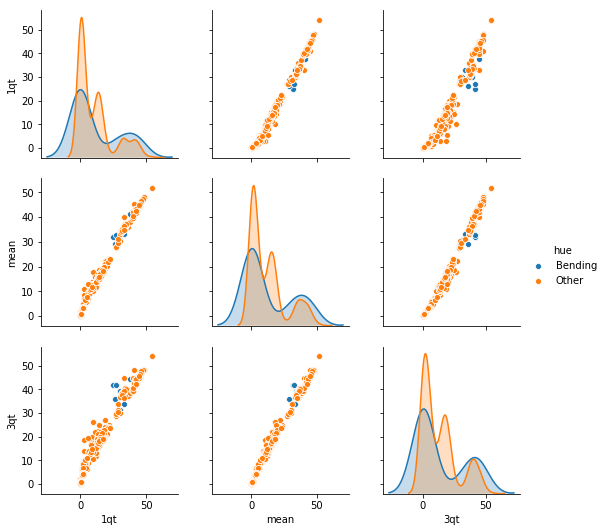

In [16]:
# '1qt','mean','3qt' matrix scatterplot for Timeseries 1,2,12
split_train = pd.concat(extract_feats_train(2))

ts_mask = ((split_train['TS'].iloc[:,0] == 1) | (split_train['TS'].iloc[:,0] == 2) | ((split_train['TS'].iloc[:,0] == 6) & (split_train['split'].iloc[:,1] == 2)))
bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = pd.concat([split_train[bend_mask & ts_mask][['1qt','mean','3qt']].iloc[:,0::2],split_train[bend_mask & ts_mask][['1qt','mean','3qt']].iloc[:,1::2]])
bend['hue'] = ['Bending']*bend.shape[0]

other = pd.concat([split_train[~(bend_mask & ts_mask)][['1qt','mean','3qt']].iloc[:,0::2],split_train[~(bend_mask & ts_mask)][['1qt','mean','3qt']].iloc[:,1::2]])
other['hue'] = ['Other']*other.shape[0]  

sns.pairplot(pd.concat([bend,other]),hue='hue')


In [6]:
# Set up dataframe for (l,p)
df_cv = pd.DataFrame()
df_cv['# Splits'] = range(1,21)
df_cv.set_index('# Splits',inplace=True)
df_cv['# Features'] = [None] * 20
df_cv['CV AUC'] = [None] * 20
df_cv['CV Balanced_Accuracy'] = [None] * 20

r = 0
# Loop over time series splits 1-20
for l in range(1,21):
    split_train = pd.concat(extract_feats_train(l), axis = 1)
    if l == 1:
        split_train = split_train.loc[:,split_train.columns!='TS']
    else:
        split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
    ts = 1
    fix = []
    for col in split_train.columns:
        if col == 'file':
            fix.append(col)
            ts = ts + 1
            continue
        else:
            fix.append(col+'_{}'.format(ts))
    split_train.columns = fix
    
    bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
    bend = split_train[bend_mask]
    bend.drop(['file'],axis = 1, inplace=True)
    bend['Target'] = [1]*bend.shape[0]

    other = split_train[~bend_mask]
    other.drop(['file'],axis = 1, inplace=True)
    other['Target'] = [0]*other.shape[0]
    
    dataset = pd.concat([bend,other])
    dataset.reset_index(drop=True,inplace=True)
    
    if l >=12:
        max_iter = 500
    else:
        max_iter = 100
    # Perform CV and RFE to find 
    model = LogisticRegression(solver='liblinear',multi_class='ovr',C=1e9,max_iter=max_iter,random_state=3)
    
    # Perform recursive feat elimination and Stratified 5-fold CV
    Xtrain = dataset.loc[:,dataset.columns!='Target']
    Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'].values)

    cv_k = 0
    skf = StratifiedKFold(n_splits=5, random_state=3).split(Xtrain,Ytrain)
    features = []
    fold_roc = []
    bal_acc = 0
    for tr, te in skf:
        # train model and find features
        rfe_cv = RFECV(estimator=model, cv=StratifiedKFold(n_splits=5,random_state=3),
                       scoring = 'balanced_accuracy')
        rfe_cv = rfe_cv.fit(Xtrain.loc[tr],Ytrain[tr])

        # Select new features in train and store
        new_Xtrain = dataset.iloc[:,rfe_cv.support_]
        features.append([rfe_cv.n_features_, rfe_cv.support_])
        
        # get score for comparison for validation set
        bal_acc = bal_acc + rfe_cv.score(Xtrain.loc[te],Ytrain[te])
        
        # Retrain model on new features in fold
        model = LogisticRegression(solver='liblinear',multi_class='ovr',C=1e9,
                                   max_iter=max_iter,random_state=3)
        new_tr_model = model.fit(new_Xtrain.loc[tr],Ytrain[tr])
        
        # Predict on kth fold and compute roc auc for comparison metric
        Ypred = new_tr_model.predict(new_Xtrain.loc[te])
        rocc = roc_auc_score(Ytrain[te],Ypred, average='weighted')
        cv_k = cv_k + rocc
        fold_roc.append(rocc)
    print(fold_roc)
    print(features)
    ones = np.where(np.array(fold_roc) == 1)[0]
    # Select min features from fold CV  
    if len(ones) > 1:
        best = 1e9
        for one in ones:
            if best > features[one][0]:
                best = features[one][0]
        df_cv.iloc[r,0] = best
    else:
        # choose features chosen with highest f1 score
        best_auc = np.argmax(fold_roc)
        df_cv.iloc[r,0] = features[best_auc][0]
    
    df_cv.iloc[r,1] = cv_k/5
    df_cv.iloc[r,2] = bal_acc/5
    # choose features chosen with highest f1 score

    print('max', df_cv.iloc[r,0])
    print('cvk',df_cv.iloc[r,1])
    print('bal acc', df_cv.iloc[r,2])
    r = r + 1
    
df_cv


Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1.0, 1.0, 1.0, 0.75, 1.0]
[[8, array([False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False, False])], [17, array([False, False,  True, False,  True,  True, False,  True, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False,  True])], [6, array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False, False])], [4, array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, F

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.5, 0.9166666666666667, 1.0, 1.0]
[[15, array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False])], [4, array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.7083333333333334, 0.5, 1.0, 0.9583333333333333, 0.5]
[[2, array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])], [17, array([False, False, False, False, False, False, False, False, False,
       False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 0.9583333333333333, 1.0, 1.0]
[[2, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.5, 1.0, 0.75, 1.0]
[[9, array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 1.0, 1.0, 1.0]
[[10, array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.75, 0.5, 1.0, 1.0, 1.0]
[[5, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, Fa

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.5, 1.0, 1.0, 1.0]
[[11, array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, F

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.5, 0.75, 0.6666666666666666, 1.0]
[[8, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 1.0, 0.75, 1.0]
[[4, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.5, 1.0, 0.75, 1.0]
[[15, array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 1.0, 1.0, 1.0]
[[6, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, F

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1.0, 0.75, 1.0, 0.75, 1.0]
[[9, array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, F

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 1.0, 0.9583333333333333, 0.5]
[[28, array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.7083333333333334, 0.75, 1.0, 0.75, 1.0]
[[6, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 0.75, 0.9583333333333333, 0.75, 1.0]
[[12, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1.0, 0.75, 1.0, 0.75, 1.0]
[[12, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, 

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1.0, 1.0, 0.9583333333333333, 1.0, 1.0]
[[6, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fa

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.9583333333333333, 1.0, 1.0, 0.9583333333333333, 0.5]
[[9, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, F

/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[0.7083333333333334, 1.0, 1.0, 0.75, 0.5]
[[6, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, F

,# Features,CV AUC,CV Balanced_Accuracy
# Splits,,,
1,6,0.95,0.985714
2,4,0.875,0.928571
3,2,0.733333,0.913187
4,5,0.933333,0.957143
5,7,0.841667,0.942857
6,1,0.941667,0.971429
7,6,0.85,0.957143
8,12,0.891667,0.957143
9,8,0.775,0.9


Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Features: 
 Index(['3qt_1', 'min_5', 'max_5', 'mean_5', '1qt_5', 'max_6'], dtype='object')
Confusion Matrix: 
 [[60  0]
 [ 0  9]]


,Coefficients,p-values
Beta,,
beta_1,-0.065849,0.399688
beta_2,-2.234947,2.78982e-36
beta_3,1.205520,3.22181e-12
beta_4,1.975736,1.94086e-11
beta_5,0.821936,3.92403e-13
beta_6,0.949630,0.073004
Intercept,-1.258281,--


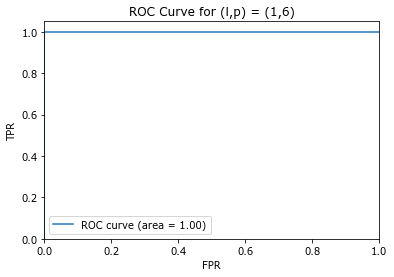

In [39]:
# Calculate (d)iv with Selected model # splits = 1
split_train = pd.concat(extract_feats_train(1), axis = 1)
split_train = split_train.loc[:,(split_train.columns!='TS')]
    
ts = 1
fix = []
for col in split_train.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
split_train.columns = fix
        
bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = split_train[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_train[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]
    
dataset = pd.concat([bend,other])
dataset.reset_index(drop=True,inplace=True)
# Set up data
Xtrain = dataset.iloc[:,0:dataset.shape[1]-1]
Ytrain = np.ravel(dataset.iloc[:,-1].values)
    
cv_k = 0
skf = StratifiedKFold(n_splits=5, random_state=3).split(Xtrain,Ytrain)
features = []
fold_roc = []
bal_acc = 0
for tr, te in skf:
        # train model and find features
    rfe_cv = RFECV(estimator=model, cv=StratifiedKFold(n_splits=5,random_state=3),
                       scoring = 'balanced_accuracy')
    rfe_cv = rfe_cv.fit(Xtrain.loc[tr],Ytrain[tr])

        # Select new features in train and store
    new_Xtrain = dataset.iloc[:,rfe_cv.support_]
    features.append([rfe_cv.n_features_, rfe_cv.support_])
        
        # get score for comparison for validation set
    bal_acc = bal_acc + rfe_cv.score(Xtrain.loc[te],Ytrain[te])
        
        # Retrain model on new features in fold
    model = LogisticRegression(solver='liblinear',multi_class='ovr',C=1e9,
                                   max_iter=max_iter,random_state=3)
    new_tr_model = model.fit(new_Xtrain.loc[tr],Ytrain[tr])
        
    # Predict on kth fold and compute roc auc for comparison metric
    Ypred = new_tr_model.predict(new_Xtrain.loc[te])
    rocc = roc_auc_score(Ytrain[te],Ypred, average='weighted')
    cv_k = cv_k + rocc
    fold_roc.append(rocc)
    
ones = np.where(np.array(fold_roc) == 1)[0]
    # Select min features from fold CV  
if len(ones) > 1:
    best = [1e9, None]
    for one in ones:
        if best[0] > features[one][0]:
            best = features[one]
else:
        # choose features chosen with highest f1 score
    best_auc = np.argmax(fold_roc)
    best = features[best_auc]

new_Xtrain = dataset.iloc[:,best[1]]
print('Features: \n', new_Xtrain.columns)
model = LogisticRegression(solver='liblinear',multi_class='ovr',C=1e9,random_state=3)
fit = model.fit(new_Xtrain,Ytrain)
coefs = [fit.intercept_[0], fit.coef_[0][0],fit.coef_[0][1],
         fit.coef_[0][2],fit.coef_[0][3],fit.coef_[0][4]
        ,fit.coef_[0][5]]#,fit.coef_[0][6],fit.coef_[0][7]]

Ypred = fit.predict(new_Xtrain)
confusion = confusion_matrix(Ytrain,Ypred)
print('Confusion Matrix: \n',confusion)

Ypred_probs = fit.predict_proba(new_Xtrain)
fpr, tpr ,_  = roc_curve(Ytrain, Ypred_probs[:,1])
roc_auc = auc(fpr, tpr)

# ROC curve    
plt.figure()
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.xticks(np.arange(0, 1, step=0.1),list(range(0.1,1,0.1)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for (l,p) = (1,6)')
plt.legend()

# Store values
dfiv = pd.DataFrame(columns = ['Beta', 'Coefficients','p-values'])
dfiv['Beta'] = ['beta_1','beta_2','beta_3','beta_4','beta_5','beta_6',
                'Intercept',]
dfiv.set_index('Beta',inplace=True)
dfiv['Coefficients'] = coefs
_, p = chi2(new_Xtrain,Ytrain)
p = list(p)
p.append('--')
dfiv['p-values'] =   p
dfiv

ret test
setting testing frames for l = 1
inst 0
Confusion Matrix: 
 [[15  0]
 [ 0  4]]
Test accuracy for l = 1 splits:  1.0


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

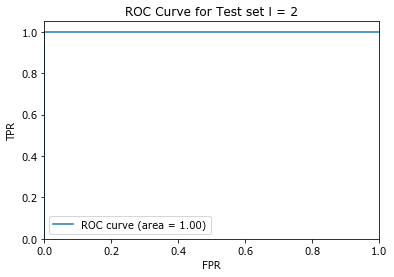

In [66]:
# (d) v
split_test = pd.concat(extract_feats_test('test', 1,'test','l=1'), axis = 1)
split_test = split_test.loc[:,(split_test.columns!='TS')]

bend_mask = (split_test['file'].iloc[:,0] == 'b1') | (split_test['file'].iloc[:,0] == 'b2')
bend = split_test[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_test[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]
    
dataset = pd.concat([other,bend])
dataset.reset_index(drop=True,inplace=True)
Xtest = dataset.iloc[:,best[1]]
Ytest = np.ravel(dataset.iloc[:,-1].values)

Ypredicited = fit.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypredicited)
print('Confusion Matrix: \n',confusion)
# Test set accuracy
test_acc = f1_score(Ytest, Ypredicited, average = 'weighted')
print('Test accuracy for l = 1 splits: ', test_acc)

Ytest_pred = fit.predict_proba(Xtest)
fpr, tpr ,_  = roc_curve(Ytest, Ytest_pred[:,1])
roc_auc = auc(fpr, tpr)

# ROC curve    
plt.figure()
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.xticks(np.arange(0, 1, step=0.1),list(range(0.1,1,0.1)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Test set l = 1')
plt.legend()


In [67]:
# v i - instability 
logit = Logit(Ytrain,new_Xtrain.astype('float')).fit()
logit.summary()

PerfectSeparationError: Perfect separation detected, results not available

Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Confusion Matrix: 
 [[12  0]
 [ 0  9]]
Train acc with subsampling:  1.0
ret test
setting testing frames for l = 1
inst 0
Confusion Matrix: 
 [[15  0]
 [ 0  4]]
Test acc with subsampling:  1.0


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

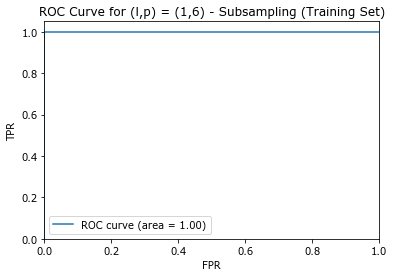

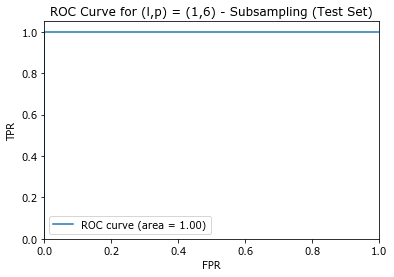

In [45]:
# v ii  case- control sampling 
# Calculate (d)iv with Selected model # splits = 1
best = ['3qt_1', 'min_5', 'max_5', 'mean_5', '1qt_5', 'max_6']
split_train = pd.concat(extract_feats_train(1), axis = 1)
split_train = split_train.loc[:,(split_train.columns!='TS')]
    
ts = 1
fix = []
for col in split_train.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
split_train.columns = fix
bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = split_train[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_train[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]

# subsample data
train = pd.concat([bend,other])
train.reset_index(drop=True,inplace=True)
class_0 = train[train['Target'] == 0] # total 69, 85%
class_1 = train[train['Target'] == 1] # total 10, 15%

sub_0 = class_0.sample(frac=0.2)
subsample = pd.concat([sub_0,class_1])
subsample.reset_index(drop=True,inplace=True)
Xtrain_sub = subsample.loc[:,best]
Ytrain_sub = subsample.loc[:,'Target']

# Implement Logisitc regression on subsample
model = LogisticRegression(solver='liblinear',multi_class='ovr',class_weight='balanced',C=1e9,random_state=3)
fit = model.fit(Xtrain_sub,Ytrain_sub)

Ypred = fit.predict(Xtrain_sub)
confusion = confusion_matrix(Ytrain_sub,Ypred)
print('Confusion Matrix: \n',confusion)
train_acc = f1_score(Ytrain_sub,Ypred, average='weighted')
print('Train acc with subsampling: ', train_acc)

Ypred_probs = fit.predict_proba(Xtrain_sub)
fpr, tpr ,_  = roc_curve(Ytrain_sub, Ypred_probs[:,1])
roc_auc = auc(fpr, tpr)

# ROC curve   for train  
plt.figure()
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for (l,p) = (1,6) - Subsampling (Training Set)')
plt.legend()

# Test subsample model 
split_test = pd.concat(extract_feats_test('test', 1,'test','l=1'), axis = 1)
split_test = split_test.loc[:,(split_test.columns!='TS')]

ts = 1
fix = []
for col in split_test.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
        
split_test.columns = fix
bend_mask = (split_test['file'].iloc[:,0] == 'b1') | (split_test['file'].iloc[:,0] == 'b2')
bend = split_test[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_test[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]
    
dataset = pd.concat([other,bend])
dataset.reset_index(drop=True,inplace=True)
Xtest = dataset.loc[:,best]
Ytest = np.ravel(dataset.loc[:,'Target'].values)

Ypred = fit.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypred)
print('Confusion Matrix: \n',confusion)
test_acc = roc_auc_score(Ytest,Ypred, average='weighted')
print('Test acc with subsampling: ', test_acc)

fpr, tpr ,_  = roc_curve(Ytest, Ypred)
roc_auc = auc(fpr, tpr)


# ROC curve     for test
plt.figure()
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for (l,p) = (1,6) - Subsampling (Test Set)')
plt.legend()




In [34]:
# (e)i using l1 regularization
df_e = pd.DataFrame()
df_e['# Splits'] = range(1,21)
df_e.set_index('# Splits',inplace=True)
df_e['Optimal C'] = [None] * 20
df_e['Accuracy'] = [None] * 20

r = 1
for l in range(1,21):
    split_train = pd.concat(extract_feats_train(l), axis = 1)
    if l == 1:
        split_train = split_train.loc[:,split_train.columns!='TS']
    else:
        split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
    ts = 1
    fix = []
    for col in split_train.columns:
        if col == 'file':
            fix.append(col)
            ts = ts + 1
            continue
        else:
            fix.append(col+'_{}'.format(ts))
            
    split_train.columns = fix
    
    bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
    bend = split_train[bend_mask]
    bend.drop(['file'],axis = 1, inplace=True)
    bend['Target'] = [1]*bend.shape[0]

    other = split_train[~bend_mask]
    other.drop(['file'],axis = 1, inplace=True)
    other['Target'] = [0]*other.shape[0]
    
    dataset = pd.concat([bend,other])
    dataset.reset_index(drop=True,inplace=True)
    
    scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
    Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
    Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])

    cv_k = 0
    skf = StratifiedKFold(n_splits=5, random_state=3)
    scores = []
    lambdas = []
    # Perform CV on lambda and dataset
    for tr, te in skf.split(Xtrain,Ytrain):
    # Cross validation to get optimal budget C and fit on training set
        modelcv = LogisticRegressionCV(solver='liblinear',cv=skf,penalty='l1',
            scoring = 'balanced_accuracy').fit(Xtrain.loc[tr],Ytrain[tr])
        lambdas.append(modelcv.C_[0])
        
        sco = modelcv.score(Xtrain.loc[te],Ytrain[te])
        cv_k = cv_k + sco
        scores.append(sco)

    print(lambdas)
    print(scores)
    
    ones = np.where(np.array(scores) == 1.0)[0]
    # Select min features from fold CV  
    if len(ones) > 1:
        minn = 1e10
        for one in ones:
            if lambdas[one] > minn:
                minn = lambdas[one]
                ind = one
        df_e.loc[r,['Optimal C','Accuracy']] = [lambdas[ind], cv_k/5]
    else:
        # choose features chosen with highest f1 score
        ind = np.argmax(scores)
        df_e.loc[r,['Optimal C','Accuracy']] = [lambdas[ind], cv_k/5]

    print('cvk  ',    cv_k/5)

    r = r + 1
df_e

Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[10000.0, 21.54434690031882, 1291.5496650148827, 21.54434690031882, 21.54434690031882]
[0.9583333333333333, 1.0, 0.75, 1.0, 0.5]
cvk   0.8416666666666666
Number of splits: 	 2
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 10000.0, 2.782559402207126, 21.54434690031882]
[1.0, 0.5, 0.7083333333333333, 0.75, 0.5]
cvk   0.6916666666666667
Number of splits: 	 3
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 10000.0, 166.81005372000558, 21.54434690031882, 21.54434690031882]
[0.9583333333333333, 0.5, 0.9583333333333333, 1.0, 1.0]
cvk   0.8833333333333332
Number of splits: 	 4
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 10000.0, 166.81005372000558, 21.54434690031882]
[0.9583333333333333, 0.75, 0.7083333333333333, 0.9583333333333333, 1.0]
cvk   0.875
Number of splits: 	 5
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 10000.0, 166.81005372000558, 166.81005372000558]
[0.9583333333333333, 0.5, 0.7083333333333333, 0.7083333333333333, 1.0]
cvk   0.775
Number of splits: 	 6
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1291.5496650148827, 10000.0, 21.54434690031882, 21.54434690031882, 2.782559402207126]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 0.5]
cvk   0.7333333333333333
Number of splits: 	 7
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1291.5496650148827, 1291.5496650148827, 10000.0, 21.54434690031882, 2.782559402207126]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 0.5]
cvk   0.7333333333333333
Number of splits: 	 8
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 1291.5496650148827, 2.782559402207126, 1291.5496650148827]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 1.0]
cvk   0.8333333333333333
Number of splits: 	 9
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 1291.5496650148827, 1291.5496650148827, 166.81005372000558, 1291.5496650148827]
[0.7083333333333333, 0.5, 0.9583333333333333, 0.75, 1.0]
cvk   0.7833333333333333
Number of splits: 	 10
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1291.5496650148827, 1291.5496650148827, 1291.5496650148827, 166.81005372000558, 166.81005372000558]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 1.0]
cvk   0.8333333333333333
Number of splits: 	 11
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 10000.0, 10000.0, 21.54434690031882, 10000.0]
[0.7083333333333333, 0.5, 0.9583333333333333, 0.75, 1.0]
cvk   0.7833333333333333
Number of splits: 	 12
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 1291.5496650148827, 21.54434690031882, 21.54434690031882]
[0.9583333333333333, 0.5, 0.9583333333333333, 1.0, 1.0]
cvk   0.8833333333333332
Number of splits: 	 13
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1291.5496650148827, 1291.5496650148827, 166.81005372000558, 166.81005372000558, 21.54434690031882]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 0.5]
cvk   0.7333333333333333
Number of splits: 	 14
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 1291.5496650148827, 1291.5496650148827, 166.81005372000558, 21.54434690031882]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 0.5]
cvk   0.7333333333333333
Number of splits: 	 15
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 1291.5496650148827, 166.81005372000558, 166.81005372000558, 21.54434690031882]
[0.9583333333333333, 0.5, 0.75, 1.0, 1.0]
cvk   0.8416666666666666
Number of splits: 	 16
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[1291.5496650148827, 1291.5496650148827, 166.81005372000558, 1291.5496650148827, 10000.0]
[0.9583333333333333, 0.5, 0.7083333333333333, 0.9583333333333333, 1.0]
cvk   0.825
Number of splits: 	 17
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 10000.0, 10000.0, 10000.0]
[0.7083333333333333, 0.5, 0.9583333333333333, 0.7083333333333333, 1.0]
cvk   0.775
Number of splits: 	 18
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 1291.5496650148827, 10000.0, 21.54434690031882, 10000.0]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 1.0]
cvk   0.8333333333333333
Number of splits: 	 19
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 166.81005372000558, 21.54434690031882, 10000.0]
[0.9583333333333333, 0.5, 1.0, 0.75, 1.0]
cvk   0.8416666666666666
Number of splits: 	 20
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 10000.0, 1291.5496650148827, 166.81005372000558, 2.782559402207126]
[0.9583333333333333, 0.5, 0.9583333333333333, 0.75, 0.5]
cvk   0.7333333333333333


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


,Optimal C,Accuracy
# Splits,,
1,10000,0.841667
2,166.81,0.691667
3,21.5443,0.883333
4,21.5443,0.875
5,166.81,0.775
6,1291.55,0.733333
7,1291.55,0.733333
8,1291.55,0.833333
9,1291.55,0.783333


In [37]:
# (e) ii test performance of L1 logreg to compare p-value approach
split_train = pd.concat(extract_feats_train(3), axis = 1)
split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
ts = 1
fix = []
for col in split_train.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
            
split_train.columns = fix

bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = split_train[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_train[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]
    
dataset = pd.concat([bend,other])
dataset.reset_index(drop=True,inplace=True)

scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])

l1_model = LogisticRegression(solver='liblinear',C = 21.5443, multi_class='ovr',
                                 random_state=3).fit(Xtrain,Ytrain)
# Train set accuracy
Ypredicted = l1_model.predict(Xtrain)
confusion = confusion_matrix(Ytrain,Ypredicted)
print('Confusion Matrix for Train Set: \n',confusion)

# Train set accuracy
Ytrain_pred = l1_model.predict(Xtrain)
roc_auc = roc_auc_score(Ytrain,Ytrain_pred,average='weighted')
print('ROC AUC For train set: ', roc_auc)


# Test set for comparison
split_test = pd.concat(extract_feats_test('test', 3,'test','l=3'), axis = 1)
split_test = split_test.loc[:,(split_test.columns!='TS')& (split_test.columns!='split')]

ts = 1
fix = []
for col in split_test.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))
            
split_test.columns = fix
bend_mask = (split_test['file'].iloc[:,0] == 'b1') | (split_test['file'].iloc[:,0] == 'b2')
bend = split_test[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [1]*bend.shape[0]

other = split_test[~bend_mask]
other.drop(['file'],axis = 1, inplace=True)
other['Target'] = [0]*other.shape[0]
    
dataset = pd.concat([bend,other])
dataset.reset_index(drop=True,inplace=True)

scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtest = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytest = np.ravel(dataset.loc[:,dataset.columns=='Target'])
# Test set accuracy
Ypredicted = l1_model.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypredicted)
print('Confusion Matrix for Test Set: \n',confusion)

# Test set accuracy
roc_auc = roc_auc_score(Ytest,Ypredicted,average='weighted')
print('ROC AUC For train set: ', roc_auc)



Number of splits: 	 3
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Confusion Matrix for Train Set: 
 [[60  0]
 [ 0  9]]
ROC AUC For train set:  1.0
ret test
setting testing dataframes for l > 1
inst 0
Confusion Matrix for Test Set: 
 [[15  0]
 [ 0  4]]
ROC AUC For train set:  1.0


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [19]:
# (f) multinomial logistic reg with l1 regularization
df_f = pd.DataFrame()
df_f['# Splits'] = range(1,21)
df_f.set_index('# Splits',inplace=True)
df_f['Optimal C'] = [None] * 20
df_f['CV Accuracy'] = [None] * 20
r = 1

for l in range(1,21):
    split_train = pd.concat(extract_feats_train(l), axis = 1)
    if l == 1:
        split_train = split_train.loc[:,split_train.columns!='TS']
    else:
        split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
    ts = 1
    fix = []
    for col in split_train.columns:
        if col == 'file':
            fix.append(col)
            ts = ts + 1
            continue
        else:
            fix.append(col+'_{}'.format(ts))           
    split_train.columns = fix
    
    bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
    bend = split_train[bend_mask]
    bend.drop(['file'],axis = 1, inplace=True)
    bend['Target'] = [0]*bend.shape[0]

    cyc_mask = split_train['file'].iloc[:,0] == 'cyc'
    cyc = split_train[cyc_mask]
    cyc.drop(['file'],axis=1,inplace=True)
    cyc['Target'] = [1]*cyc.shape[0]
    
    lying_mask = split_train['file'].iloc[:,0] == 'lying'
    lying = split_train[lying_mask]
    lying.drop(['file'],axis=1,inplace=True)
    lying['Target'] = [2]*lying.shape[0]
        
    sitting_mask = split_train['file'].iloc[:,0] == 'sitting'
    sitting = split_train[sitting_mask]
    sitting.drop(['file'],axis=1,inplace=True)
    sitting['Target'] = [3]*sitting.shape[0]
    
    standing_mask = split_train['file'].iloc[:,0] == 'standing'
    standing = split_train[standing_mask]
    standing.drop(['file'],axis=1,inplace=True)
    standing['Target'] = [4]*standing.shape[0]
    
    walking_mask = split_train['file'].iloc[:,0] == 'walking'
    walking = split_train[walking_mask]
    walking.drop(['file'],axis=1,inplace=True)
    walking['Target'] = [5]*walking.shape[0]
    
    dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
    dataset.reset_index(drop=True,inplace=True)
    
    scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
    Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
    Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])

    cv_k = 0
    skf = StratifiedKFold(n_splits=5, random_state=3).split(Xtrain,Ytrain)
    scores = []
    lambdas = []
    # Perform CV on lambda and dataset
    for tr, te in skf:
    # Cross validation to get optimal budget C and fit on training set
        modelcv = LogisticRegressionCV(solver='saga',cv=5,penalty='l1',
                    multi_class='multinomial',max_iter = 1e5).fit(Xtrain.loc[tr],Ytrain[tr])
        lambdas.append((modelcv.C_[0]))
        
        # CV to select best l 
        sco = modelcv.score(Xtrain.loc[te],Ytrain[te])
        cv_k = cv_k + sco
        
        scores.append(sco)
        
    print(lambdas)
    print(scores)
    
    ones = np.where(np.array(scores) == 1)[0]
    # Select min features from fold CV  
    if len(ones) > 1:
        minn = 1e10
        for one in ones:
            if lambdas[one] > minn:
                minn = lambdas[one]
                ind = one
        df_f.loc[r,['Optimal C','CV Accuracy']] = [lambdas[ind], cv_k/5]
    else:
        # choose features chosen with highest f1 score
        ind = np.argmax(scores)
        df_f.loc[r,['Optimal C','CV Accuracy']] = [lambdas[ind], cv_k/5]

    print('cvk  ',    cv_k/5)

    r = r + 1
    
df_f

Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 166.81005372000558, 21.54434690031882, 2.782559402207126, 2.782559402207126]
[0.9411764705882353, 0.7647058823529411, 0.9166666666666666, 0.8333333333333334, 0.9090909090909091]
cvk   0.8729946524064172
Number of splits: 	 2
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 2.782559402207126, 166.81005372000558, 166.81005372000558, 21.54434690031882]
[0.8235294117647058, 0.7647058823529411, 1.0, 0.75, 0.7272727272727273]
cvk   0.8131016042780749
Number of splits: 	 3
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 21.54434690031882, 10000.0, 166.81005372000558, 2.782559402207126]
[1.0, 0.8235294117647058, 0.8333333333333334, 0.8333333333333334, 0.45454545454545453]
cvk   0.7889483065953654
Number of splits: 	 4
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 2.782559402207126, 2.782559402207126, 2.782559402207126, 2.782559402207126]
[0.9411764705882353, 0.8823529411764706, 0.9166666666666666, 1.0, 0.7272727272727273]
cvk   0.89349376114082
Number of splits: 	 5
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 1291.5496650148827, 1291.5496650148827, 2.782559402207126]
[0.9411764705882353, 0.7647058823529411, 0.75, 0.8333333333333334, 0.6363636363636364]
cvk   0.7851158645276293
Number of splits: 	 6
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 2.782559402207126, 2.782559402207126, 166.81005372000558, 2.782559402207126]
[0.9411764705882353, 0.7058823529411765, 0.8333333333333334, 0.6666666666666666, 0.6363636363636364]
cvk   0.7566844919786095
Number of splits: 	 7
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 2.782559402207126, 2.782559402207126, 2.782559402207126, 21.54434690031882]
[0.8823529411764706, 0.7647058823529411, 0.8333333333333334, 1.0, 0.6363636363636364]
cvk   0.8233511586452764
Number of splits: 	 8
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 1291.5496650148827, 21.54434690031882, 166.81005372000558, 2.782559402207126]
[0.8823529411764706, 0.8235294117647058, 0.75, 0.75, 0.6363636363636364]
cvk   0.7684491978609626
Number of splits: 	 9
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 2.782559402207126, 2.782559402207126, 166.81005372000558, 2.782559402207126]
[0.9411764705882353, 0.7647058823529411, 0.75, 0.75, 0.7272727272727273]
cvk   0.7866310160427809
Number of splits: 	 10
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 1291.5496650148827, 166.81005372000558, 2.782559402207126, 2.782559402207126]
[0.8235294117647058, 0.7647058823529411, 0.75, 0.8333333333333334, 0.6363636363636364]
cvk   0.7615864527629232
Number of splits: 	 11
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 166.81005372000558, 2.782559402207126, 1291.5496650148827, 21.54434690031882]
[0.8823529411764706, 0.7647058823529411, 0.75, 0.75, 0.5454545454545454]
cvk   0.7385026737967915
Number of splits: 	 12
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[2.782559402207126, 166.81005372000558, 2.782559402207126, 166.81005372000558, 2.782559402207126]
[0.8235294117647058, 0.8823529411764706, 0.6666666666666666, 0.8333333333333334, 0.7272727272727273]
cvk   0.7866310160427809
Number of splits: 	 13
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 2.782559402207126, 2.782559402207126, 2.782559402207126]
[0.8823529411764706, 0.8235294117647058, 0.8333333333333334, 0.8333333333333334, 0.5454545454545454]
cvk   0.7836007130124777
Number of splits: 	 14
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 1291.5496650148827, 2.782559402207126, 166.81005372000558, 2.782559402207126]
[0.8235294117647058, 0.7647058823529411, 0.6666666666666666, 0.6666666666666666, 0.5454545454545454]
cvk   0.6934046345811051
Number of splits: 	 15
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 2.782559402207126, 166.81005372000558, 2.782559402207126]
[0.8235294117647058, 0.8235294117647058, 0.75, 0.8333333333333334, 0.6363636363636364]
cvk   0.7733511586452763
Number of splits: 	 16
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 2.782559402207126, 21.54434690031882, 166.81005372000558]
[0.8235294117647058, 0.7058823529411765, 0.75, 0.5833333333333334, 0.6363636363636364]
cvk   0.6998217468805704
Number of splits: 	 17
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[21.54434690031882, 166.81005372000558, 166.81005372000558, 166.81005372000558, 1291.5496650148827]
[0.7647058823529411, 0.8823529411764706, 0.6666666666666666, 0.6666666666666666, 0.7272727272727273]
cvk   0.7415329768270944
Number of splits: 	 18
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[166.81005372000558, 166.81005372000558, 2.782559402207126, 10000.0, 2.782559402207126]
[0.8235294117647058, 0.6470588235294118, 0.75, 0.6666666666666666, 0.6363636363636364]
cvk   0.7047237076648841
Number of splits: 	 19
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[2.782559402207126, 166.81005372000558, 2.782559402207126, 166.81005372000558, 21.54434690031882]
[0.8823529411764706, 0.7647058823529411, 0.6666666666666666, 0.75, 0.5454545454545454]
cvk   0.7218360071301247
Number of splits: 	 20
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

[2.782559402207126, 166.81005372000558, 21.54434690031882, 166.81005372000558, 21.54434690031882]
[0.7058823529411765, 0.7647058823529411, 0.75, 0.75, 0.8181818181818182]
cvk   0.7577540106951872


,Optimal Lambda,CV Accuracy
# Splits,,
1,21.5443,0.872995
2,166.81,0.813102
3,166.81,0.788948
4,2.78256,0.893494
5,166.81,0.785116
6,166.81,0.756684
7,2.78256,0.823351
8,166.81,0.768449
9,166.81,0.786631


Number of splits: 	 4
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Confusion Matrix for Train Set: 
 [[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]
Accuracy score for train set:  1.0
ret test
setting testing dataframes for l > 1
inst 0


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Confusion Matrix for Test Set: 
 [[3 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [1 0 0 0 2 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]
Accuracy Score For Test set:  0.7894736842105263


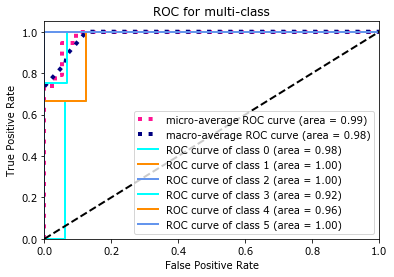

In [46]:
# continuation of f(i) for model evaluation
split_train = pd.concat(extract_feats_train(4), axis = 1)
split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
ts = 1
fix = []
for col in split_train.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))           
split_train.columns = fix
    
bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = split_train[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [0]*bend.shape[0]

cyc_mask = split_train['file'].iloc[:,0] == 'cyc'
cyc = split_train[cyc_mask]
cyc.drop(['file'],axis=1,inplace=True)
cyc['Target'] = [1]*cyc.shape[0]
    

lying_mask = split_train['file'].iloc[:,0] == 'lying'
lying = split_train[lying_mask]
lying.drop(['file'],axis=1,inplace=True)
lying['Target'] = [2]*lying.shape[0]
        
sitting_mask = split_train['file'].iloc[:,0] == 'sitting'
sitting = split_train[sitting_mask]
sitting.drop(['file'],axis=1,inplace=True)
sitting['Target'] = [3]*sitting.shape[0]
    
standing_mask = split_train['file'].iloc[:,0] == 'standing'
standing = split_train[standing_mask]
standing.drop(['file'],axis=1,inplace=True)
standing['Target'] = [4]*standing.shape[0]
    
walking_mask = split_train['file'].iloc[:,0] == 'walking'
walking = split_train[walking_mask]
walking.drop(['file'],axis=1,inplace=True)
walking['Target'] = [5]*walking.shape[0]
    
dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
dataset.reset_index(drop=True,inplace=True)

scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])


l1_multi = LogisticRegression(C = 2.782559402207126,solver='saga',penalty='l1',random_state=3,
                    multi_class='multinomial',max_iter=1e9).fit(Xtrain,Ytrain)

# Train set confusion matrix
Ypredicted = l1_multi.predict(Xtrain)
confusion = confusion_matrix(Ytrain,Ypredicted)
print('Confusion Matrix for Train Set: \n',confusion)

# Train set accuracy
print('Accuracy score for train set: ', l1_multi.score(Xtrain,Ytrain))

# Test set multiclass evaluation
split_test = pd.concat(extract_feats_test('test',4,'test','l=4'), axis = 1)
split_test = split_test.loc[:,(split_test.columns!='TS') & (split_test.columns!='split')]
    
ts = 1
fix = []
for col in split_test.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))           
split_test.columns = fix
    
bend_mask = (split_test['file'].iloc[:,0] == 'b1') | (split_test['file'].iloc[:,0] == 'b2')
bend = split_test[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [0]*bend.shape[0]

cyc_mask = split_test['file'].iloc[:,0] == 'cyc'
cyc = split_test[cyc_mask]
cyc.drop(['file'],axis=1,inplace=True)
cyc['Target'] = [1]*cyc.shape[0]
    
lying_mask = split_test['file'].iloc[:,0] == 'lying'
lying = split_test[lying_mask]
lying.drop(['file'],axis=1,inplace=True)
lying['Target'] = [2]*lying.shape[0]
        
sitting_mask = split_test['file'].iloc[:,0] == 'sitting'
sitting = split_test[sitting_mask]
sitting.drop(['file'],axis=1,inplace=True)
sitting['Target'] = [3]*sitting.shape[0]
    
standing_mask = split_test['file'].iloc[:,0] == 'standing'
standing = split_test[standing_mask]
standing.drop(['file'],axis=1,inplace=True)
standing['Target'] = [4]*standing.shape[0]
        
walking_mask = split_test['file'].iloc[:,0] == 'walking'
walking = split_test[walking_mask]
walking.drop(['file'],axis=1,inplace=True)
walking['Target'] = [5]*walking.shape[0]

dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
dataset.reset_index(drop=True,inplace=True)

scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtest = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytest = np.ravel(dataset.loc[:,dataset.columns=='Target'])

# Test set confusion matrix
Ypredicted = l1_multi.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypredicted)
print('Confusion Matrix for Test Set: \n',confusion)

# Test set accuracy
print('Accuracy Score For Test set: ', l1_multi.score(Xtest,Ytest))

Y_bin = label_binarize(Ytest, classes=[0, 1, 2,3,4,5])
y_score = l1_multi.predict_proba(Xtest)
n_classes = 6
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(Y_bin[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate(([fpr[i] for i in range(n_classes)])))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw = 2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class')
plt.legend(loc="lower right")
plt.show()

In [40]:
# using Naive Bayes Classifier
df_fii = pd.DataFrame()
df_fii['# Splits'] = range(1,21)
df_fii.set_index('# Splits',inplace=True)
df_fii['Gaussian NB CV'] = [None] * 20
df_fii['Multinomial NB CV'] = [None] * 20

r = 1
for l in range(1,21):
    split_train = pd.concat(extract_feats_train(l), axis = 1)
    if l == 1:
        split_train = split_train.loc[:,split_train.columns!='TS']
    else:
        split_train = split_train.loc[:,(split_train.columns!='TS') & (split_train.columns!='split')]
    
    ts = 1
    fix = []
    for col in split_train.columns:
        if col == 'file':
            fix.append(col)
            ts = ts + 1
            continue
        else:
            fix.append(col+'_{}'.format(ts))           
    split_train.columns = fix
    
    bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
    bend = split_train[bend_mask]
    bend.drop(['file'],axis = 1, inplace=True)
    bend['Target'] = [0]*bend.shape[0]

    cyc_mask = split_train['file'].iloc[:,0] == 'cyc'
    cyc = split_train[cyc_mask]
    cyc.drop(['file'],axis=1,inplace=True)
    cyc['Target'] = [1]*cyc.shape[0]
    
    lying_mask = split_train['file'].iloc[:,0] == 'lying'
    lying = split_train[lying_mask]
    lying.drop(['file'],axis=1,inplace=True)
    lying['Target'] = [2]*lying.shape[0]
        
    sitting_mask = split_train['file'].iloc[:,0] == 'sitting'
    sitting = split_train[sitting_mask]
    sitting.drop(['file'],axis=1,inplace=True)
    sitting['Target'] = [3]*sitting.shape[0]
    
    standing_mask = split_train['file'].iloc[:,0] == 'standing'
    standing = split_train[standing_mask]
    standing.drop(['file'],axis=1,inplace=True)
    standing['Target'] = [4]*standing.shape[0]
    
    walking_mask = split_train['file'].iloc[:,0] == 'walking'
    walking = split_train[walking_mask]
    walking.drop(['file'],axis=1,inplace=True)
    walking['Target'] = [5]*walking.shape[0]
    
    dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
    dataset.reset_index(drop=True,inplace=True)
    
    scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
    Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
    Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])

    gb_cv_k = 0
    mb_cv_k = 0
    skf = StratifiedKFold(n_splits=5, random_state=3).split(Xtrain,Ytrain)
    # Perform CV on lambda and dataset
    for tr, te in skf:
        # Perform Gaussian Naive Bayes
        gb = GaussianNB().fit(Xtrain.loc[tr],Ytrain[tr])
        sco = gb.score(Xtrain.loc[te],Ytrain[te])
        gb_cv_k = gb_cv_k + sco
        
        # Perform NB with multinomial
        mb = MultinomialNB().fit(Xtrain.loc[tr],Ytrain[tr])
        sco = mb.score(Xtrain.loc[te],Ytrain[te])
        mb_cv_k = mb_cv_k + sco
        
    df_fii.loc[r,'Gaussian NB CV'] = gb_cv_k/5
    df_fii.loc[r,'Multinomial NB CV'] = mb_cv_k / 5
    
    print('cvk Gauss ',    gb_cv_k/5)
    print('cvk Multi ',    mb_cv_k/5)

    r = r + 1
    
df_fii


Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.8146167557932265
cvk Multi  0.7410873440285205
Number of splits: 	 2
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.7900178253119429
cvk Multi  0.7180035650623886
Number of splits: 	 3
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6683600713012477
cvk Multi  0.6547237076648842
Number of splits: 	 4
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.7016934046345812
cvk Multi  0.67825311942959
Number of splits: 	 5
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.7198752228163994
cvk Multi  0.72825311942959
Number of splits: 	 6
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6399286987522282
cvk Multi  0.7115864527629233
Number of splits: 	 7
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6615864527629233
cvk Multi  0.67825311942959
Number of splits: 	 8
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.7119429590017826
cvk Multi  0.7164884135472371
Number of splits: 	 9
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6903743315508021
cvk Multi  0.6880570409982175
Number of splits: 	 10
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6600713012477718
cvk Multi  0.7164884135472371
Number of splits: 	 11
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6688057040998218
cvk Multi  0.6713903743315508
Number of splits: 	 12
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6281639928698752
cvk Multi  0.6880570409982175
Number of splits: 	 13
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.625222816399287
cvk Multi  0.7047237076648842
Number of splits: 	 14
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.6217468805704099
cvk Multi  0.6713903743315508
Number of splits: 	 15
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.57174688057041
cvk Multi  0.7047237076648842
Number of splits: 	 16
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.5948306595365419
cvk Multi  0.6880570409982175
Number of splits: 	 17
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.5477718360071301
cvk Multi  0.7047237076648842
Number of splits: 	 18
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.5129233511586453
cvk Multi  0.6880570409982175
Number of splits: 	 19
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.5599821746880571
cvk Multi  0.6880570409982175
Number of splits: 	 20
setting training dataframes for l > 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

cvk Gauss  0.57174688057041
cvk Multi  0.6880570409982175


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Gaussian NB CV,Multinomial NB CV
# Splits,,
1,0.814617,0.741087
2,0.790018,0.718004
3,0.66836,0.654724
4,0.701693,0.678253
5,0.719875,0.728253
6,0.639929,0.711586
7,0.661586,0.678253
8,0.711943,0.716488
9,0.690374,0.688057


In [51]:
# Get confusion matrices for Gaussian and Multinomial
split_train = pd.concat(extract_feats_train(1), axis = 1)
split_train = split_train.loc[:,split_train.columns!='TS']
    
ts = 1
fix = []
for col in split_train.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))           
split_train.columns = fix
    
bend_mask = (split_train['file'].iloc[:,0] == 'b1') | (split_train['file'].iloc[:,0] == 'b2')
bend = split_train[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [0]*bend.shape[0]

cyc_mask = split_train['file'].iloc[:,0] == 'cyc'
cyc = split_train[cyc_mask]
cyc.drop(['file'],axis=1,inplace=True)
cyc['Target'] = [1]*cyc.shape[0]
    
lying_mask = split_train['file'].iloc[:,0] == 'lying'
lying = split_train[lying_mask]
lying.drop(['file'],axis=1,inplace=True)
lying['Target'] = [2]*lying.shape[0]
            
sitting_mask = split_train['file'].iloc[:,0] == 'sitting'
sitting = split_train[sitting_mask]
sitting.drop(['file'],axis=1,inplace=True)
sitting['Target'] = [3]*sitting.shape[0]
    
standing_mask = split_train['file'].iloc[:,0] == 'standing'
standing = split_train[standing_mask]
standing.drop(['file'],axis=1,inplace=True)
standing['Target'] = [4]*standing.shape[0]
    
walking_mask = split_train['file'].iloc[:,0] == 'walking'
walking = split_train[walking_mask]
walking.drop(['file'],axis=1,inplace=True)
walking['Target'] = [5]*walking.shape[0]
    
dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
dataset.reset_index(drop=True,inplace=True)
    
scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtrain = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytrain = np.ravel(dataset.loc[:,dataset.columns=='Target'])

#get Test set
split_test = pd.concat(extract_feats_test('test',1,'test','l=1'), axis = 1)
split_test = split_test.loc[:,split_test.columns!='TS']
    
ts = 1
fix = []
for col in split_test.columns:
    if col == 'file':
        fix.append(col)
        ts = ts + 1
        continue
    else:
        fix.append(col+'_{}'.format(ts))           
split_test.columns = fix
    
bend_mask = (split_test['file'].iloc[:,0] == 'b1') | (split_test['file'].iloc[:,0] == 'b2')
bend = split_test[bend_mask]
bend.drop(['file'],axis = 1, inplace=True)
bend['Target'] = [0]*bend.shape[0]

cyc_mask = split_test['file'].iloc[:,0] == 'cyc'
cyc = split_test[cyc_mask]
cyc.drop(['file'],axis=1,inplace=True)
cyc['Target'] = [1]*cyc.shape[0]
    
lying_mask = split_test['file'].iloc[:,0] == 'lying'
lying = split_test[lying_mask]
lying.drop(['file'],axis=1,inplace=True)
lying['Target'] = [2]*lying.shape[0]
            
sitting_mask = split_test['file'].iloc[:,0] == 'sitting'
sitting = split_test[sitting_mask]
sitting.drop(['file'],axis=1,inplace=True)
sitting['Target'] = [3]*sitting.shape[0]
    
standing_mask = split_test['file'].iloc[:,0] == 'standing'
standing = split_test[standing_mask]
standing.drop(['file'],axis=1,inplace=True)
standing['Target'] = [4]*standing.shape[0]
    
walking_mask = split_test['file'].iloc[:,0] == 'walking'
walking = split_test[walking_mask]
walking.drop(['file'],axis=1,inplace=True)
walking['Target'] = [5]*walking.shape[0]
    
dataset = pd.concat([bend,cyc,standing,walking,lying,sitting])
dataset.reset_index(drop=True,inplace=True)
    
scaled = MinMaxScaler().fit_transform(dataset.loc[:,dataset.columns!='Target'].astype('float'))
Xtest = pd.DataFrame(scaled,columns = fix[0:dataset.shape[1]-1])
Ytest = np.ravel(dataset.loc[:,dataset.columns=='Target'])


gb = GaussianNB().fit(Xtrain,Ytrain)
Ypred = gb.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypred)
print('Accuracy on test set for Gaussian:', gb.score(Xtest,Ytest))
print('Confusion Matrix for Test Set for Gaussian: \n',confusion)
        
# Perform NB with multinomial
mb = MultinomialNB().fit(Xtrain,Ytrain)
Ypred = mb.predict(Xtest)
confusion = confusion_matrix(Ytest,Ypred)
print('Accuracy on test set for Multinomial:', mb.score(Xtest,Ytest))
print('Confusion Matrix for Test Set for Multinomial: \n',confusion)



Number of splits: 	 1
setting train frame for l = 1


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

ret test
setting testing frames for l = 1
inst 0


/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rubinakabir/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Accuracy on test set for Gaussian: 0.5789473684210527
Confusion Matrix for Test Set for Gaussian: 
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [1 0 2 0 0 0]
 [2 0 0 1 0 0]
 [0 0 1 2 0 0]
 [0 2 0 0 0 1]]
Accuracy on test set for Multinomial: 0.9473684210526315
Confusion Matrix for Test Set for Multinomial: 
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]
